## **Assignment 4: Linear Programming**



## **Setup**





**Please log into your Stanford Google Drive account when viewing this notebook.** Log in using your SUNetID credentials.

Before we can start Assignment 4, we need to go through a few minor tasks, as we did in Assignment 1:
1. Copy Google Colab Notebook (File > Save a copy in Drive)
2. Connect to Github Data Repo
3. Set Up Working Directory

The detailed instructions for the above tasks were provided in Assignment 1, so we don't need to go through them again here. If you need assistance with any of the above tasks, please refer to Assignment 1. We'll simply implement tasks 2 and 3 in the code cell below.

In [ ]:
# Connect to Github Data Repo
!git clone https://github.com/verma-aniket/CEE_266G_Data_Repo GitRepo

# Set up working directory
import os
wdir = 'GitRepo/Data'
os.chdir(wdir)

Cloning into 'GitRepo'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 50 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (50/50), 1.03 MiB | 4.76 MiB/s, done.
Resolving deltas: 100% (10/10), done.


*** Please remember to save a copy of this Google Colab notebook to your drive so that you can edit it.**

Once the above code cell is finished running, you are ready to start Assignment 4!

A special package must be installed before you can work on this assignment. Please run the code cell below to install the package "cvxpy".

In [ ]:
!pip install cvxpy

## **Assignment 4**

**You are encouraged to discuss the problems with your group and with the teaching team. You may not collaborate with students outside your group.  The final code and write up you submit must be your own.**

This assignment contains incomplete Python code that you will complete, as well as some write ups. Please feel free to add text or coding cells as you see fit. There are two problems for you to complete.

Presented in this Google Colab notebook is starter code for for Problem 2. Feel free to complete Problem 1 using any tool you prefer.(i.e., by hand, MS Excel, Python). **Please make sure to upload all of your work as a PDF when submitting on Gradscope.**

In the code snippet below, we will import the required libraries for Assignment 4.

In [ ]:
# Import required libraries
import cvxpy as cvx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys


# **Problem 1**: Loucks and Van Beek problem 4.32

Two types of crops can be grown in a particular irrigation area each year. Each unit quantity of crop $A$ can be sold for a price $P_A$ and requires $W_A$ units of water, $L_A$ units of land, $F_A$ units of fertilizer, and $H_A$ units of labor. Similarly, crop $B$ can be sold at a unit price of $P_B$ and requires $W_B$, $L_B$, $F_B$ and $H_B$ units of water, land, fertilizer, and labor, respectively, per unit of crop. Assume that the available quantities of water, land, fertilizer, and labor are known, and equal $W$, $L$, $F$, and $H$, respectively.

*Part A:*	Formulate a linear programming model for estimating the quantities of each of the two crops that should be produced in order to maximize total income.

When writing out the problem formulation, you can use Google Colab's Markdown Guide for Python and write your equations directly into a text cell (https://colab.research.google.com/notebooks/markdown_guide.ipynb).

Alternatively, feel free to use any word processing software. You can also write out the formulation by hand. Please make sure to submit this with your assignment as a PDF.

*Part B:*	Solve the problem graphically, using the following data:

Resource  | Requirements | per Unit of:  | Max. Available Resources
----------|--------------| --------------|---------------------
          |    Crop A    |   Crop B      |
Water | 3 | 4 | 64
Land | 5  | 3 | 90
Fertilizer | 2 | 3 | 60
Labor | 3 | 1 | 36
Unit Price | 40 | 30 |


Note: You must solve the LP formulation ***graphically*** (can't use the cvxpy package).

Feel free to either graph the problem by hand or use any graphing or spreadsheet software. You can also solve the program graphically using Python (using plotting tools only). When solving the LP formulation, you can also chose to solve the system of equations by hand. Please make sure to submit all of your work for this question with your assignment as a PDF.


# **Problem 2**: LP Formulation of Melbourne Water Supply

We will again model water supply during the Millennium Drought in Melbourne, this time using linear programming instead of simulation. We have provided starter code (see cells below) that solves a linear program based on the following problem:

Melbourne Water would like to minimize the total cost of supplying water from 2000 to 2014 while meeting 100% of water demand. As before, water supply can come from three sources: net inflows, desalinated water, and pipeline water. Net inflows and the maximum availability, both in MCM, have already been read from “net_inflow.csv” and “pipeline_availability.csv”, respectively. The maximum capacity of the desalination plant is 150 MCM. It costs \$0.45 per m3 to supply desalinated water and \$0.28 per m3 to import water from the pipeline.

***Unlike in the simulation homework, here we will no longer assume that Melbourne water has to import all or none of the pipeline and desalinated water. Rather, they can import as much as they’d like up to the available capacity each year.***


The reservoir capacity is 1812 MCM. Reservoir storage starts in the year 2000 at 600 MCM. The reservoir can never go below 580 MCM.  Water demand varies each year. This data has already been read in from the file “demand.csv”. The units for demand are in MCM


In the code snippet below, we will import the data for Problem 2. This code reads in the net flow, demand, and pipeline data as a "pandas dataframe". We also set all of the parameters provided in this question.

Please run this cell!

In [ ]:
# Import data
# All units in MCM
data = pd.read_csv('net_inflow.csv', header=None, names=['Year', 'Inflow'])
data = data[data['Year']>=2000]
pipeline = np.loadtxt('pipeline_availability.csv', delimiter=',')
demand = np.loadtxt('demand.csv', delimiter=',')
data['Pipeline'] = pipeline[:,1]
data['Demand'] = demand[:,1]
data = data[data['Year']<=2015]
del demand, pipeline
data.set_index('Year', inplace = True)
print(data)

# Parameters

K = 1812 # reservoir capacity [MCM]
K0 = 600 # initial storage capacity [MCM]
minK = 580 # minimum storage level [MCM]580
KT = 600 # final storage capacity [MCM] (leave reservoir as full as it started) 600
pipelineCost = 0.28 * 10**6 # $ per MCM
desalCost = 0.45 * 10**6 # $ per MCM

      Inflow  Pipeline  Demand
Year                          
2000     560     172.0   518.0
2001     426     189.0   548.0
2002     324     124.0   570.0
2003     509     219.0   530.0
2004     508     229.0   530.0
2005     389     145.0   557.0
2006     163      65.0   608.0
2007     374     107.0   560.0
2008     287      79.0   579.0
2009     369     164.0   561.0
2010     559     200.0   518.0
2011     634     245.0   501.0
2012     658     194.0   495.0
2013     416     142.0   551.0
2014     421     119.0   549.0
2015      36      10.0   636.0


*Part A*: Formulate a linear program representing the problem above. We have provided Python code that solves this problem; you must write out the mathematical formulation. (Note it does not have to be in standard form i.e. you may use =, <= and >= constraints).

When writing out the problem formulation, you can use Google Colab's Markdown Guide for python and write your equations directly into a text cell (https://colab.research.google.com/notebooks/markdown_guide.ipynb). Alternatively, feel free to use any word processing software. You can also write out the formulation by hand. Please make sure to submit this with your assignment as a PDF.

What are the decision variables?

Run the LP for Melbourne Water. What is the optimal objective value?

Solution status: optimal
Optimal objective value: 633469999.9228528
Optimal values of storage DVs: [ 600.          828.57156203  909.28117502  800.85767413 1010.79084987
 1230.05148422 1221.3947657   858.40219236  795.68552501  598.49027893
  580.00000003  748.01487331 1016.28153348 1281.14626217 1235.71618508
 1193.32481661]
Optimal values of release DVs: [517.99999998 547.99999998 569.99999999 529.99999999 529.99999999
 556.99999999 607.99999999 559.99999998 578.99999999 560.99999998
 517.99999999 500.99999999 494.99999999 550.99999999 548.99999999
 635.99999999]
Optimal values of pipeline DVs: [172.         189.         124.         218.99999999 229.
 145.          65.00000001 107.00000001  79.00000001 163.99999998
 127.01487328 135.26666017 101.86472869  89.56992289  85.60863153
   6.67518338]
Optimal values of desal DVs: [ 1.45715620e+01  1.37096130e+01  1.35764991e+01  1.19331757e+01
  1.22606343e+01  1.43432815e+01  1.70074266e+01  1.62833326e+01
  1.58047539e+01  9.50972110e+00

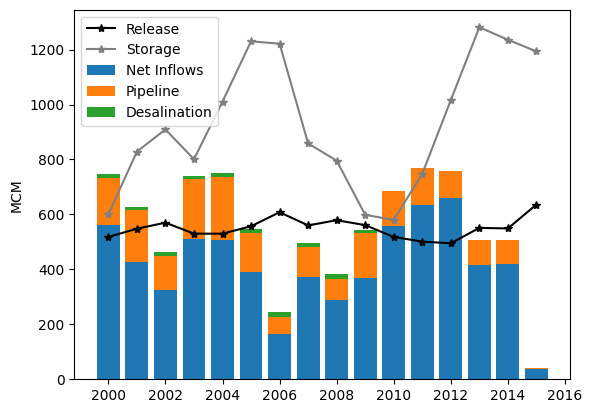

In [ ]:
# %% Formulate Problem

# Number of time periods
T = 2015 - 2000 + 1
years = np.arange(2000, 2015)

# Create a vector S of storage decision variables for each time period
S = cvx.Variable(T)

# Create a vector R of releases each time period
R = cvx.Variable(T)

# Create a vector P of pipeline water imports in each t
P = cvx.Variable(T)

# Create a vector D of desal water imports in each t
D = cvx.Variable(T)

# Create  list of constraints
constraints = []

# Add initial storage constraint
constraints += [S[0] == K0]

# Loop over time range and add constraints that apply in all time periods
for t in range(T):

    # Add water balance constraints
    if t < T-1:
        constraints += [
            S[t + 1] == S[t] - R[t] + data['Inflow'].iloc[t] + P[t] + D[t]
        ]
    else:
        # last time period (because we have a specific constraint for last time period)
        constraints += [
            S[t] - R[t] + data['Inflow'].iloc[t] + P[t] + D[t] == KT
        ]

    # Add storage capacity constraints
    constraints += [
        S[t] <= K,  # Storage can't be above capacity
        S[t] >= minK # Storage can't go below minimum threshold
    ]

    # Add reliability constraints
    constraints += [
        R[t] >= data['Demand'].iloc[t]
    ]

    # Add pipeline and desal availability constraints
    constraints += [
        P[t] <= data['Pipeline'].iloc[t],
        D[t] <= desalCapacity
    ]

    # Add non-negativity constraints
    constraints += [
        S[t] >= 0, R[t] >= 0, P[t] >= 0, D[t] >= 0
    ]

# Create objective function (Minimize total cost of imported water)
objective = cvx.Minimize(cvx.sum(P) * pipelineCost +
                         cvx.sum(D) * desalCost)

# %% Solve LP
prob = cvx.Problem(objective, constraints)
prob.solve()
print("Solution status: " + prob.status) # status is optimal, infeasible, or unbounded
print("Optimal objective value: {}".format(prob.objective.value))
print("Optimal values of storage DVs: {}".format(S.value))
print("Optimal values of release DVs: {}".format(R.value))
print("Optimal values of pipeline DVs: {}".format(P.value))
print("Optimal values of desal DVs: {}".format(D.value))

# Don't continue with analysis of results unless optimal solution found
if(prob.status != 'optimal'):
    sys.exit() # end program because no optimal solution was found

# %% Check and Plot Water Balance

# Calculate water balance
deltaS = np.diff(np.append(S.value, KT))
supply = data['Inflow'] + P.value + D.value
balance = deltaS - supply + R.value

# Verify that water balance is zero
if np.abs(sum(balance)) > 0.1:
    raise Exception("Water balance does not sum to zero")

# Plot water supply and demand
plt.figure()
plt.bar(data.index, data['Inflow'], label='Net Inflows')
plt.bar(data.index, P.value, label='Pipeline', bottom=data['Inflow'])
plt.bar(data.index, D.value, label='Desalination', bottom=data['Inflow'] + P.value)
plt.plot(data.index, R.value, 'k*-', label='Release')
plt.plot(data.index, S.value, '*-', c='gray', label='Storage')
plt.legend()
plt.ylabel('MCM')
plt.show()

*Part B:* For this question we would like you to consider two storage constraint scenarios. In order to efficiently test these scenarios, create a function using the code provided in Part A.

Storage constraint scenarios:
1.   Change the minimum storage threshold to 0. How does the optimal objective value and the water supply portfolio change (from Part A) and why?
2.   Reset the minimum storage threshold to 580 MCM. Now, change the final storage volume to be 1500 MCM in 2016. What is the result of the LP? Why?

For full credit, your explanation of “why” must include both a physical description of what is happening in the problem and also a description of what is happening in the LP using LP terminology. For Case 1 specifically, make a plot of the water supply portfolio and qualitatively interpret it.

In [ ]:
# Create LP formulation function

T = 2015 - 2000 + 1
years = np.arange(2000, 2015)

def LP_mb(minK, KT):
  # Create a vector S of storage decision variables for each time period
  S = cvx.Variable(T)

  # Create a vector R of releases each time period
  R = cvx.Variable(T)

  # Create a vector P of pipeline water imports in each t
  P = cvx.Variable(T)

  # Create a vector D of desal water imports in each t
  D = cvx.Variable(T)

  # Create  list of constraints
  constraints = []

  # Add initial storage constraint
  constraints += [S[0] == K0]

  for t in range(T):

    # Add water balance constraints
    if t < T-1:
        constraints += [
            S[t + 1] == S[t] - R[t] + data['Inflow'].iloc[t] + P[t] + D[t]
        ]
    else:
        # last time period (because we have a specific constraint for last time period)
        constraints += [
            S[t] - R[t] + data['Inflow'].iloc[t] + P[t] + D[t] == KT
        ]

    # Add storage capacity constraints
    constraints += [
        S[t] <= K,  # Storage can't be above capacity
        S[t] >= minK # Storage can't go below minimum threshold
    ]

    # Add reliability constraints
    constraints += [
        R[t] >= data['Demand'].iloc[t]
    ]

    # Add pipeline and desal availability constraints
    constraints += [
        P[t] <= data['Pipeline'].iloc[t],
        D[t] <= desalCapacity
    ]

    # Add non-negativity constraints
    constraints += [
        S[t] >= 0, R[t] >= 0, P[t] >= 0, D[t] >= 0
    ]

  # Create objective function (Minimize total cost of imported water)
  objective = cvx.Minimize(cvx.sum(P) * pipelineCost +
                         cvx.sum(D) * desalCost)

  # %% Solve LP
  prob = cvx.Problem(objective, constraints)
  prob.solve()

  return prob.objective.value,  S.value, R.value, P.value, D.value


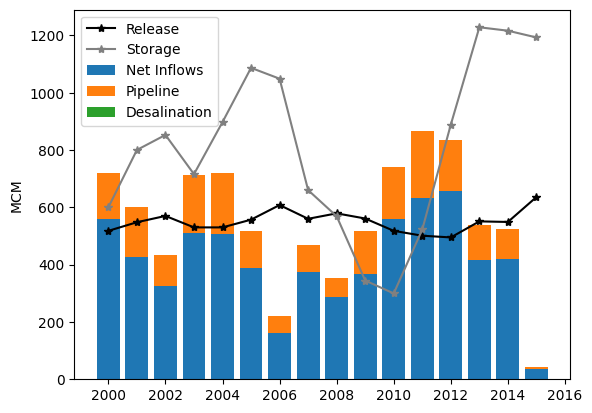

The Optimal objective value: 609839999.6938688


In [ ]:
# Run the LP function for Case 1
S_ctn = np.zeros(16)
R_ctn = np.zeros(16)
P_ctn = np.zeros(16)
D_ctn = np.zeros(16)
obj_ctn, S_ctn, R_ctn, P_ctn, D_ctn = LP_mb(0, KT)
plt.figure()
plt.bar(data.index, data['Inflow'], label='Net Inflows')
plt.bar(data.index, P_ctn, label='Pipeline', bottom=data['Inflow'])
plt.bar(data.index, D_ctn, label='Desalination', bottom=data['Inflow'] + P_ctn)
plt.plot(data.index, R_ctn, 'k*-', label='Release')
plt.plot(data.index, S_ctn, '*-', c='gray', label='Storage')
plt.legend()
plt.ylabel('MCM')
plt.show()
print ("The Optimal objective value:", obj_ctn)

For Scenario 1, the optimal objective value decreases as the minimum storage threshold decreases. This is because, during periods of low net flow, we can rely on stored water instead of importing water from the desalination plant, which is more economical.

In [ ]:
# Run the LP function for Case 2
obj_ctn, S_ctn, R_ctn, P_ctn, D_ctn = LP_mb(580, 1500)
print ("Optiml S:" ,S_ctn)
print ("Optiml R:" ,R_ctn)
print ("Optiml P:" ,P_ctn)
print ("Optiml D:" ,D_ctn)
print ("Optimal Objective Value", obj_ctn)


Optiml S: None
Optiml R: None
Optiml P: None
Optiml D: None
Optimal Objective Value None


There is no opimal value foe this scenario since the final capacity is too large which is beyond the solution space.

*Part C:* Reformulate the LP to have only equality constraints by adding slack and surplus variables.

Provide the mathematical equations for the new LP and also adapt the code to the new formulation. As with Part A, you can use any word processing software or write out the formulation by hand. Please make sure to submit this with your assignment as a PDF.

Solve the new LP. Have any of the optimal values of the decision variables changed? Why or why not? Report the optimal values of all of the slack and surplus variables and interpret their values.

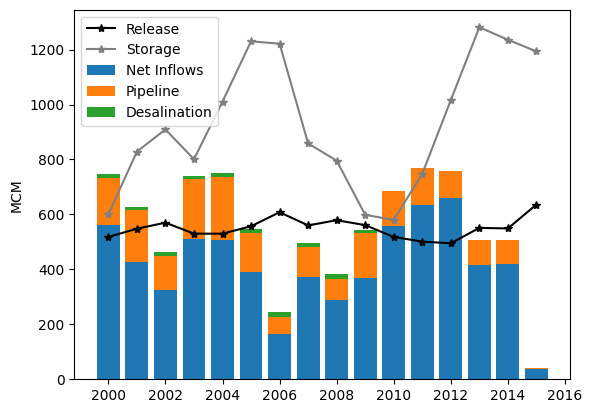

The Optimal objective value: 633469992.2853085
Optimal values of storage DVs: [ 600.          828.57156286  909.28117643  800.85767622 1010.79085108
 1230.05148515 1221.3947673   858.40219497  795.68552825  598.49028301
  580.00000252  748.01487541 1016.28153234 1281.14625935 1235.71618237
 1193.32481492]
Optimal values of release DVs: [517.99999848 547.9999985  569.99999851 529.99999853 529.99999852
 556.9999985  607.99999852 559.9999985  578.99999852 560.99999844
 517.99999917 500.99999939 494.99999938 550.99999909 548.99999905
 635.9999992 ]
Optimal values of pipeline DVs: [172.00000046 189.00000024 124.0000004  218.99999911 228.99999958
 145.00000042  65.00000053 107.00000057  79.00000055 163.99999791
 127.01487223 135.2666566  101.86472666  89.56992226  85.60863158
   6.67518413]
Optimal values of desal DVs: [ 1.45715609e+01  1.37096118e+01  1.35764979e+01  1.19331743e+01
  1.22606330e+01  1.43432802e+01  1.70074257e+01  1.62833312e+01
  1.58047527e+01  9.50972003e+00 -1.74260882e

In [ ]:
# reformulate LP by adding slack and surplus variables

import cvxpy as cvx
import numpy as np

# Define constants, data, and capacities
T = 2015 - 2000 + 1
years = np.arange(2000, 2015)

def LP_mb_equality(minK, KT):
  # Create vectors for primary decision variables
  S = cvx.Variable(T)
  R = cvx.Variable(T)
  P = cvx.Variable(T)
  D = cvx.Variable(T)

  # Slack and surplus variables
  S_slack = cvx.Variable(T)
  S_surplus = cvx.Variable(T)
  R_surplus = cvx.Variable(T)
  P_slack = cvx.Variable(T)
  D_slack = cvx.Variable(T)

  # List of constraints
  constraints = []

  # Initial storage constraint
  constraints += [S[0] == K0]

  # Water balance and other equality constraints
  for t in range(T):
    # Water balance constraint
    if t < T-1:
        constraints += [
            S[t + 1] == S[t] - R[t] + data['Inflow'].iloc[t] + P[t] + D[t]
        ]
    else:
        # Specific constraint for last time period
        constraints += [
            S[t] - R[t] + data['Inflow'].iloc[t] + P[t] + D[t] == KT
        ]

    # Reformulated storage capacity constraints
    constraints += [
        S[t] + S_slack[t] == K,
        S[t] - S_surplus[t] == minK
    ]

    # Reformulated reliability constraint
    constraints += [
        R[t] - R_surplus[t] == data['Demand'].iloc[t]
    ]

    # Reformulated pipeline and desalination constraints
    constraints += [
        P[t] + P_slack[t] == data['Pipeline'].iloc[t],
        D[t] + D_slack[t] == desalCapacity
    ]

    # Non-negativity for primary variables
    constraints += [
        S[t] >= 0, R[t] >= 0, P[t] >= 0, D[t] >= 0,
        S_slack[t] >= 0, S_surplus[t] >= 0, R_surplus[t] >= 0,
        P_slack[t] >= 0, D_slack[t] >= 0
    ]

  # Objective function: minimize total cost of imported water
  objective = cvx.Minimize(cvx.sum(P) * pipelineCost + cvx.sum(D) * desalCost)

  # Solve LP
  prob = cvx.Problem(objective, constraints)
  prob.solve()

  return (prob.objective.value, S.value, R.value, P.value, D.value,
          S_slack.value, S_surplus.value, R_surplus.value, P_slack.value, D_slack.value)


S_ctn = np.zeros(16)
R_ctn = np.zeros(16)
P_ctn = np.zeros(16)
D_ctn = np.zeros(16)
s_slk = np.zeros(16)
s_sps = np.zeros(16)
r_sps = np.zeros(16)
p_slk = np.zeros(16)
d_slk = np.zeros(16)

obj_ctn, S_ctn, R_ctn, P_ctn, D_ctn, s_slk, s_sps, r_sps, p_slk, d_slk = LP_mb_equality(580,600)

plt.figure()
plt.bar(data.index, data['Inflow'], label='Net Inflows')
plt.bar(data.index, P_ctn, label='Pipeline', bottom=data['Inflow'])
plt.bar(data.index, D_ctn, label='Desalination', bottom=data['Inflow'] + P_ctn)
plt.plot(data.index, R_ctn, 'k*-', label='Release')
plt.plot(data.index, S_ctn, '*-', c='gray', label='Storage')
plt.legend()
plt.ylabel('MCM')
plt.show()


print ("The Optimal objective value:", obj_ctn)
print("Optimal values of storage DVs:", S_ctn)
print("Optimal values of release DVs:", R_ctn)
print("Optimal values of pipeline DVs:", P_ctn)
print("Optimal values of desal DVs:", D_ctn)

print("Storage Slack (S_slack):", s_slk)
print("Storage Surplus (S_surplus):", s_sps)
print("Release Surplus (R_surplus):", r_sps)
print("Pipeline Slack (P_slack):", p_slk)
print("Desal Slack (D_slack):", d_slk)

The optimal values of the decision variables remain unchanged since adding slack and surplus variables merely changes the representation, not the feasible region or objective function.
A slack variable of zero means the constraint is tight (fully utilized).
A non-zero slack or surplus value suggests that the capacity (or minimum requirement) has not been fully met.

Part D: Melbourne Water receives an offer from the irrigators it imports pipeline water from. They have offered an updated contract that would supply double the amount of pipeline water during the worst drought years: 2006, 2007, and 2008.

Using Lagrange multipliers from the current LP, calculate what Melbourne water would be willing to pay to receive one additional MCM of water in each of the drought years 2006, 2007, and 2008. Calculate a separate value for each year. Hint: For each constraint in the LP, you can find the associated Lagrange multiplier using the property “dual_value”. See an example in the documentation (https://www.cvxpy.org/tutorial/advanced/index.html?highlight=dual).

Then, run a new version of the LP reflecting the new doubled pipeline water availability from 2006-2008 and use the results to calcualte what Melbourne Water would be willing to pay for this updated contract.

How does the information you learned from the Langrage multipliers compare to the information you learned from the new LP formulation?

In [ ]:
# %% Formulate Problem

# Number of time periods
T = 2015 - 2000 + 1
years = np.arange(2000, 2015)

# Create a vector S of storage decision variables for each time period
S = cvx.Variable(T)

# Create a vector R of releases each time period
R = cvx.Variable(T)

# Create a vector P of pipeline water imports in each t
P = cvx.Variable(T)

# Create a vector D of desal water imports in each t
D = cvx.Variable(T)

# Create  list of constraints
constraints = []

# Add initial storage constraint
constraints += [S[0] == K0]

# Loop over time range and add constraints that apply in all time periods
for t in range(T):

    # Add water balance constraints
    if t < T-1:
        constraints += [
            S[t + 1] == S[t] - R[t] + data['Inflow'].iloc[t] + P[t] + D[t]
        ]
    else:
        # last time period (because we have a specific constraint for last time period)
        constraints += [
            S[t] - R[t] + data['Inflow'].iloc[t] + P[t] + D[t] == KT
        ]

    # Pipeline availability constraints (separate for drought years)
    if data.index[t] in [2006, 2007, 2008]:  # Identify drought years
        constraints.append(P[t] <= (data['Pipeline'].iloc[t])*2)  # Save for dual extraction
    else:
        constraints.append(P[t] <= data['Pipeline'].iloc[t])

    # Add storage capacity constraints
    constraints += [
        S[t] <= K,  # Storage can't be above capacity
        S[t] >= minK # Storage can't go below minimum threshold
    ]

    # Add reliability constraints
    constraints += [
        R[t] >= data['Demand'].iloc[t]
    ]



    # Add pipeline and desal availability constraints
    constraints += [
        P[t] <= data['Pipeline'].iloc[t],
        D[t] <= desalCapacity
    ]


    # Add non-negativity constraints
    constraints += [
        S[t] >= 0, R[t] >= 0, P[t] >= 0, D[t] >= 0
    ]

# Create objective function (Minimize total cost of imported water)
objective = cvx.Minimize(cvx.sum(P) * pipelineCost +
                         cvx.sum(D) * desalCost)

# %% Solve LP
prob = cvx.Problem(objective, constraints)
prob.solve()

dual_values_drought_years = [constraints[6+11*t].dual_value for t in [6, 7, 8]]

print("Langrage multipliers for 2006, 2007 and 2008 is", dual_values_drought_years)


Langrage multipliers for 2006, 2007 and 2008 is [169999.9999089374, 169999.99990083167, 169999.99989964603]


In [ ]:
# Run new version of the LP

data['Pipeline'].iloc[data.index.isin([2006,2007,2008])] *= 2

# %% Formulate Problem

# Number of time periods
T = 2015 - 2000 + 1
years = np.arange(2000, 2015)

# Create a vector S of storage decision variables for each time period
S = cvx.Variable(T)

# Create a vector R of releases each time period
R = cvx.Variable(T)

# Create a vector P of pipeline water imports in each t
P = cvx.Variable(T)

# Create a vector D of desal water imports in each t
D = cvx.Variable(T)

# Create  list of constraints
constraints = []

# Add initial storage constraint
constraints += [S[0] == K0]

# Loop over time range and add constraints that apply in all time periods
for t in range(T):

    # Add water balance constraints
    if t < T-1:
        constraints += [
            S[t + 1] == S[t] - R[t] + data['Inflow'].iloc[t] + P[t] + D[t]
        ]
    else:
        # last time period (because we have a specific constraint for last time period)
        constraints += [
            S[t] - R[t] + data['Inflow'].iloc[t] + P[t] + D[t] == KT
        ]

    # Add storage capacity constraints
    constraints += [
        S[t] <= K,  # Storage can't be above capacity
        S[t] >= minK # Storage can't go below minimum threshold
    ]

    # Add reliability constraints
    constraints += [
        R[t] >= data['Demand'].iloc[t]
    ]



    # Add pipeline and desal availability constraints
    constraints += [
        P[t] <= data['Pipeline'].iloc[t],
        D[t] <= desalCapacity
    ]


    # Add non-negativity constraints
    constraints += [
        S[t] >= 0, R[t] >= 0, P[t] >= 0, D[t] >= 0
    ]

# Create objective function (Minimize total cost of imported water)
objective = cvx.Minimize(cvx.sum(P) * pipelineCost +
                         cvx.sum(D) * desalCost)

# %% Solve LP
prob = cvx.Problem(objective, constraints)
prob.solve()

obj_values_diff = - (prob.objective.value - 633469999)

print ("Willingness to pay", obj_values_diff)

<ipython-input-11-372712744471>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Pipeline'].iloc[data.index.isin([2006,2007,2008])] *= 2
<ipython-input-11-372712744471>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

Willingness to pay 23629999.082612872


The Langrage's output is 170000*3 which equals 510,000 while the LP show the saved money can be 23,629,999

*Part E:*  This linear programming model assumes that Melbourne Water has perfect foresight about the future: the net inflows and pipeline water availability, which vary from year to year, are known in advance. Looking at the results in water balance plot, what is one aspect of the results driven by perfect foresight that might be unrealistic? Based on this, what advice would you give to a water planner using an LP model to guide future water supply planning?

One aspect likely driven by perfect foresight is the model’s ability to store or release water in a highly optimized way, often avoiding shortages and minimizing costs by timing releases precisely with periods of high demand or low inflow. This results in smoother storage levels and precise allocation of pipeline and desalination sources, which would be difficult to achieve in reality due to unpredictable weather patterns, inflow variances, and demand fluctuations.
Suggestions: Introduce probabilistic inflows and demand values into the LP model. By considering the likelihood of different inflow and demand patterns, the model can generate solutions that hedge against a range of possible futures, balancing between efficiency and resilience.

*Part F:*  LP requires a single objective formulation, and our implementation uses the cost of supplying water as the objective. However, we are interested in minimizing both cost and water supply shortages. There are two approaches we can use to address the effect of different water supply reliability goals on our problem using LP, one using constraints and one using the objective function. Formulate (i.e. write down the equations but do not solve) two alternative LPs using each of these approaches, and discuss the pros and cons of each.

**Objective function approach**
Pros:
Direct Cost-Reliability Trade-Off: By adjusting α, planners can explore different balances between cost and reliability, with lower α values prioritizing reliability more strongly.
Cons:
Choosing an appropriate α is challenging and requires either domain expertise or iterative testing to find a realistic penalty that reflects the true cost or disutility of shortages.

**Contraints**
Pros: The cost remains the sole objective, making it straightforward to solve and interpret.
Cons: It doesn’t provide a direct trade-off between cost and reliability, making it hard to analyze how much extra cost is incurred for incremental reliability improvements.

*Part G:*  Unlike in the simulation homework, here we no longer assume that Melbourne water has to import all or none of the pipeline and desalinated water. Is it possible to implement that constraint (all or nothing water imports) using LP? Why or why not?

No, it is not. LP models require all decision variables to be continuous, meaning they can take on any fractional value within the feasible range. The "all or nothing" condition, however, is inherently a binary constraint that requires variables to take only discrete values (either 0 or a positive amount representing full capacity).

*Part H:* Compare the simulated Melbourne results from Problem Set 3 Question 2 (you may use the solutions for problem set 3 provided on Canvas) to your optimized results from this problem set. Identify one difference that you notice in the results and explain why it may be useful to compare the simulation and optimization results.

One noticeable difference is that the simulation results import pipeline and desalination water only intermittently, depending on specific years' conditions, while the optimized results import water consistently every year. This difference likely arises because simulation models follow predefined rules based on annual conditions, whereas optimization actively seeks to minimize costs or maximize benefits, resulting in more stable water import patterns across years.

And that's Problem 2!

To turn in your assignment:
*   Click the "Share" button in the top right corner of the file. Add the three members of the teaching team as viewers, and uncheck the "Notify People" option. Click Share.

*   Go back to the "Share" button and copy the link to your file. Paste the link in the text box below. This allows the teaching team to access the original code file if needed.
*   Please save your Google Colab notebook as a PDF by following the exporting instructions posted on Canvas. Next, hand in your assignment by uploading your pdf to Gradescope.

And that's the end of Assignment 4!